In [1]:
# Loading Libraries

import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('breast_cancer_data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [7]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [10]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [4]:
# Here we are mapping 0 and 1 to B and M
data['diagnosis']=data['diagnosis'].map({'B':0,'M':1})

In [12]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
data.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [14]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [5]:
X=data.drop('diagnosis',axis=1)
y=data['diagnosis']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [8]:
classifier=LogisticRegression()

In [9]:
classifier.fit(X_train,y_train)

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
classifier.score(X_train,y_train)

0.952755905511811

In [11]:
classifier.score(X_test,y_test)

0.9627659574468085

### 25-6-22 ---> Confusion Matrix

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
y_test.value_counts()

0    121
1     67
Name: diagnosis, dtype: int64

In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[117,   4],
       [  3,  64]], dtype=int64)

In [45]:
# smote confusion matrix

y_res_pred = classifier_res.predict(X_test)
confusion_matrix(y_test,y_res_pred)

array([[116,   5],
       [  4,  63]], dtype=int64)

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       121
           1       0.94      0.96      0.95        67

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



### ---------------------------------------------------------------------------------------------------------------

# SMOTE

In [21]:
# Smote for data balancing - synthetic Minority Over-sampling Technique
# to install ---> pip install imbalanced-learn (in terminal) or ! pip install imbalanced-learn (in notebook)

In [22]:
# ! pip install imbalanced-learn

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
sm = SMOTE(random_state=42)

In [25]:
X_train.shape

(381, 30)

In [26]:
y_train.shape

(381,)

In [27]:
X_res,y_res = sm.fit_resample(X_train,y_train)

In [28]:
y_train.value_counts()

0    236
1    145
Name: diagnosis, dtype: int64

In [29]:
y_res.value_counts()

1    236
0    236
Name: diagnosis, dtype: int64

In [30]:
X_res.shape

(472, 30)

In [31]:
classifier_res = LogisticRegression()
classifier_res.fit(X_res,y_res)

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
classifier_res.score(X_res,y_res)

0.934322033898305

In [33]:
classifier_res.score(X_test,y_test)

0.9521276595744681

===================================================================================================================================

# ENSEMBLE

In [12]:
# Log Regression

clf=LogisticRegression()

clf.fit(X_train,y_train)

Score=clf.score(X_train,y_train)
print(f"Train Accuracy for {clf.__class__.__name__} is {Score}")

Score=clf.score(X_test,y_test)
print(f"Test Accuracy for {clf.__class__.__name__} is {Score}")

print("=========================================")

Train Accuracy for LogisticRegression is 0.952755905511811
Test Accuracy for LogisticRegression is 0.9627659574468085


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Log Regression

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train,y_train)

Score=clf.score(X_train,y_train)
print(f"Train Accuracy for {clf.__class__.__name__} is {Score}")

Score=clf.score(X_test,y_test)
print(f"Test Accuracy for {clf.__class__.__name__} is {Score}")

print("=========================================")

Train Accuracy for RandomForestClassifier is 1.0
Test Accuracy for RandomForestClassifier is 0.9521276595744681


In [14]:
clf.feature_importances_

array([0.03163379, 0.01476331, 0.05971437, 0.02488562, 0.00450103,
       0.01873565, 0.10262316, 0.13310072, 0.00325688, 0.00435747,
       0.01324271, 0.00479666, 0.0229486 , 0.02323962, 0.0033864 ,
       0.00344148, 0.01306214, 0.00680999, 0.00449149, 0.0066848 ,
       0.07448616, 0.01626092, 0.09093696, 0.09394745, 0.01292583,
       0.02393186, 0.04063277, 0.1297542 , 0.01173269, 0.00571526])

In [23]:
Feature_imp=pd.Series(clf.feature_importances_,index=clf.feature_names_in_).sort_values(ascending=False)
Feature_imp

concave points_mean        0.133101
concave points_worst       0.129754
concavity_mean             0.102623
area_worst                 0.093947
perimeter_worst            0.090937
radius_worst               0.074486
perimeter_mean             0.059714
concavity_worst            0.040633
radius_mean                0.031634
area_mean                  0.024886
compactness_worst          0.023932
area_se                    0.023240
perimeter_se               0.022949
compactness_mean           0.018736
texture_worst              0.016261
texture_mean               0.014763
radius_se                  0.013243
concavity_se               0.013062
smoothness_worst           0.012926
symmetry_worst             0.011733
concave points_se          0.006810
fractal_dimension_se       0.006685
fractal_dimension_worst    0.005715
texture_se                 0.004797
smoothness_mean            0.004501
symmetry_se                0.004491
fractal_dimension_mean     0.004357
compactness_se             0

In [17]:
# We can eliminate columns with less importance and build the model again and model may perform well.

In [20]:
! pip show scikit-learn

Name: scikit-learn
Version: 1.1.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\admin\anaconda3\lib\site-packages
Requires: threadpoolctl, numpy, scipy, joblib
Required-by: scikit-learn-intelex, imbalanced-learn


<AxesSubplot:>

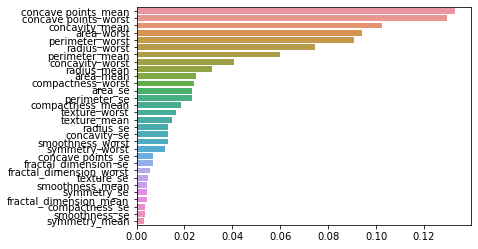

In [26]:
import seaborn as sns 

sns.barplot(x=Feature_imp,y=Feature_imp.index)

In [ ]:
# Do random_forest on boston dataset and also do it with decision tree and analyse the result.

In [7]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()

clf.fit(X_train,y_train)

Score=clf.score(X_train,y_train)
print(f"Train Accuracy for {clf.__class__.__name__} is {Score}")

Score=clf.score(X_test,y_test)
print(f"Test Accuracy for {clf.__class__.__name__} is {Score}")

print("=========================================")

Train Accuracy for AdaBoostClassifier is 1.0
Test Accuracy for AdaBoostClassifier is 0.9521276595744681


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

clf.fit(X_train,y_train)

Score=clf.score(X_train,y_train)
print(f"Train Accuracy for {clf.__class__.__name__} is {Score}")

Score=clf.score(X_test,y_test)
print(f"Test Accuracy for {clf.__class__.__name__} is {Score}")

print("=========================================")

Train Accuracy for GradientBoostingClassifier is 1.0
Test Accuracy for GradientBoostingClassifier is 0.9521276595744681


In [10]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,max_features=5)
# Here, 500 trees are made. max_features are given to specify each tree is made with only 5 columns taken at random.
# learning_rate is only used for GradientBoostingClassifier and not used for AdaBoosting, as it is the Alpha or we can say error that is given.
clf.fit(X_train,y_train)

Score=clf.score(X_train,y_train)
print(f"Train Accuracy for {clf.__class__.__name__} is {Score}")

Score=clf.score(X_test,y_test)
print(f"Test Accuracy for {clf.__class__.__name__} is {Score}")

print("=========================================")

Train Accuracy for GradientBoostingClassifier is 1.0
Test Accuracy for GradientBoostingClassifier is 0.9627659574468085


In [16]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=800,learning_rate=1,max_features=5,random_state=100)

clf.fit(X_train,y_train)

Score=clf.score(X_train,y_train)
print(f"Train Accuracy for {clf.__class__.__name__} is {Score}")

Score=clf.score(X_test,y_test)
print(f"Test Accuracy for {clf.__class__.__name__} is {Score}")

print("=========================================")

Train Accuracy for GradientBoostingClassifier is 1.0
Test Accuracy for GradientBoostingClassifier is 0.9840425531914894
